## **Rendu TP2 (19/10/2023)**
### **Binome : Linda BELKESSA - Youcef AZOUAOUI (M2 Datascale)**

## **Contenu du Notebook**


> 1. **Part I : Etude descriptive et statistique**
2.   **Part II : Etude exploratoire des données**






In [ ]:
"""Importation des packages"""

#Manipulation des données
import pandas as pd
import numpy as np


#Visualisation et affichage
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.express import scatter_geo

#Manipulating datetimes
import datetime as dt

#Analyse factorielle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Manipulation de séries temporelles
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [ ]:
#Chargement des données depuis URL Github

data = pd.read_csv("https://raw.githubusercontent.com/Lynda-Starkus/ML-PROJ/master/dataset/tornados.csv")
data.head(10)

,om,yr,mo,dy,date,time,tz,datetime_utc,st,stf,...,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,America/Chicago,1950-10-02T03:00:00Z,OK,40,...,-102.30,15.8,10,1,1,25,0,0,0,False
1,193,1950,10,9,1950-10-09,02:15:00,America/Chicago,1950-10-09T08:15:00Z,NC,37,...,0.00,2.0,880,1,1,47,0,0,0,False
2,195,1950,11,20,1950-11-20,02:20:00,America/Chicago,1950-11-20T08:20:00Z,KY,21,...,0.00,0.1,10,1,1,177,0,0,0,False
3,196,1950,11,20,1950-11-20,04:00:00,America/Chicago,1950-11-20T10:00:00Z,KY,21,...,0.00,0.1,10,1,1,209,0,0,0,False
4,197,1950,11,20,1950-11-20,07:30:00,America/Chicago,1950-11-20T13:30:00Z,MS,28,...,0.00,2.0,37,1,1,101,0,0,0,False
5,194,1950,11,4,1950-11-04,17:00:00,America/Chicago,1950-11-04T23:00:00Z,PA,42,...,-75.93,15.9,100,1,1,71,11,0,0,False
6,198,1950,12,2,1950-12-02,15:00:00,America/Chicago,1950-12-02T21:00:00Z,IL,17,...,-89.72,18.8,50,1,1,119,117,0,0,False
7,199,1950,12,2,1950-12-02,16:00:00,America/Chicago,1950-12-02T22:00:00Z,IL,17,...,-89.38,18.0,200,1,1,119,5,0,0,False
8,200,1950,12,2,1950-12-02,16:25:00,America/Chicago,1950-12-02T22:25:00Z,AR,5,...,-91.72,7.8,10,1,1,65,0,0,0,False
9,201,1950,12,2,1950-12-02,17:30:00,America/Chicago,1950-12-02T23:30:00Z,IL,17,...,-89.62,9.6,50,1,1,157,0,0,0,False


In [ ]:
#Afficher les tornades sur la map des USA
scatter_geo(data_frame=data.sample(n=len(data) // 10), lat='slat', lon='slon', color='st', scope='usa')

## **Partie I : Etude descriptive et statistique**

In [ ]:
# Afficher les informations (nom, type, valeurs nulles des variables) sur les données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68693 entries, 0 to 68692
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   om            68693 non-null  int64  
 1   yr            68693 non-null  int64  
 2   mo            68693 non-null  int64  
 3   dy            68693 non-null  int64  
 4   date          68693 non-null  object 
 5   time          68693 non-null  object 
 6   tz            68693 non-null  object 
 7   datetime_utc  68693 non-null  object 
 8   st            68693 non-null  object 
 9   stf           68693 non-null  int64  
 10  mag           67937 non-null  float64
 11  inj           68693 non-null  int64  
 12  fat           68693 non-null  int64  
 13  loss          41523 non-null  float64
 14  slat          68693 non-null  float64
 15  slon          68693 non-null  float64
 16  elat          68693 non-null  float64
 17  elon          68693 non-null  float64
 18  len           68693 non-nu

### **Interprétation :**
- Nous avons **27** variables présentes dans notre jeu de données dont **1 booléenne**, **21 numériques** et **5 dont le type n'est pas précisé**.

- On peut convertir la variable **st** à une variable catégorique car elle encode l'état fédéral où s'est produit la tornade.


In [ ]:
# Calcul des descripteurs statistiques (moyenne, écart type, min, max ... etc)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
om,68693.0,1.132018e+05,2.266220e+05,1.0000,285.00,588.0000,1118.00,6.220800e+05
yr,68693.0,1.991854e+03,1.956516e+01,1950.0000,1976.00,1995.0000,2008.00,2.022000e+03
mo,68693.0,5.968541e+00,2.444656e+00,1.0000,4.00,6.0000,7.00,1.200000e+01
dy,68693.0,1.593088e+01,8.750070e+00,1.0000,8.00,16.0000,24.00,3.100000e+01
stf,68693.0,2.922026e+01,1.501327e+01,1.0000,18.00,28.0000,42.00,7.800000e+01
mag,67937.0,7.787215e-01,8.957898e-01,0.0000,0.00,1.0000,1.00,5.000000e+00
inj,68693.0,1.418689e+00,1.811475e+01,0.0000,0.00,0.0000,0.00,1.740000e+03
fat,68693.0,8.931041e-02,1.472120e+00,0.0000,0.00,0.0000,0.00,1.580000e+02
loss,41523.0,2.020898e+06,3.039588e+07,50.0000,10000.00,50000.0000,500000.00,2.800100e+09
slat,68693.0,3.712939e+01,5.099005e+00,17.7212,33.18,37.0000,40.92,6.102000e+01


### **Interprétations :**


- **Variable "yr" (année) :** Les données couvrent une période allant de 1950 à 2022, centrée autour des années 1990.

- **Variable "mo" (mois) :** Les événements sont répartis relativement uniformément sur les mois de l'année.

- **Variables "dy" (jour) et "stf" (code d'État) :** Les jours et les codes d'État varient sur l'ensemble des plages possibles.

- **Variable "mag" (magnitude) :** La plupart des mesures sont faibles, mais il existe une grande variabilité, allant de 0 à 5.

- **Variables "inj" (blessures) et "fat" (décès) :** La plupart des événements n'entraînent ni blessures ni décès, avec la majorité des observations à zéro.

- **Variable "loss" (pertes) :** Les pertes varient considérablement.

- **Variables "len" (longueur) et "wid" (largeur) :** Les dimensions varient, mais la plupart des valeurs sont relativement faibles.


In [ ]:
# Chercher les colonnes qui contiennent des valeurs manquantes
missing_values_count = data.isna().sum()
print(missing_values_count)

om                  0
yr                  0
mo                  0
dy                  0
date                0
time                0
tz                  0
datetime_utc        0
st                  0
stf                 0
mag               756
inj                 0
fat                 0
loss            27170
slat                0
slon                0
elat                0
elon                0
len                 0
wid                 0
ns                  0
sn                  0
f1                  0
f2                  0
f3                  0
f4                  0
fc                  0
dtype: int64


In [ ]:
# Afficher les descripteurs statistiques des colonnes modifiées avant et après

#Avant remplacement
columns_to_fill = ['loss', 'mag']

data[columns_to_fill].describe().T

,count,mean,std,min,25%,50%,75%,max
loss,41523.0,2.020898e+06,3.039588e+07,50.0,10000.0,50000.0,500000.0,2.800100e+09
mag,67937.0,7.787215e-01,8.957898e-01,0.0,0.0,1.0,1.0,5.000000e+00


In [ ]:
#Après remplacement par stratégie backwards fill


data.dropna(subset=columns_to_fill, inplace=True)

#data[columns_to_fill] = data[columns_to_fill].fillna(data[columns_to_fill].ffill())
#data[columns_to_fill] = data[columns_to_fill].fillna(data[columns_to_fill].bfill())
#data[columns_to_fill] = data[columns_to_fill].fillna(data[columns_to_fill].mean())
#data[columns_to_fill] = data[columns_to_fill].fillna(data[columns_to_fill].mod())

data[columns_to_fill].describe().T

,count,mean,std,min,25%,50%,75%,max
loss,41517.0,2.021189e+06,3.039807e+07,50.0,10000.0,50000.0,500000.0,2.800100e+09
mag,41517.0,1.069201e+00,9.163410e-01,0.0,0.0,1.0,2.0,5.000000e+00


## **Interprétation :**
Après avoir testé les stratégies suivantes :    
- Backward fill, forward fill, mean, mod et drop NaN, nous avons constaté que les descripteurs statistiques ne changent pas significativement avec le drop NaN, donc nous l'avons appliqué.

<ipython-input-9-4e4bb41302d2>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



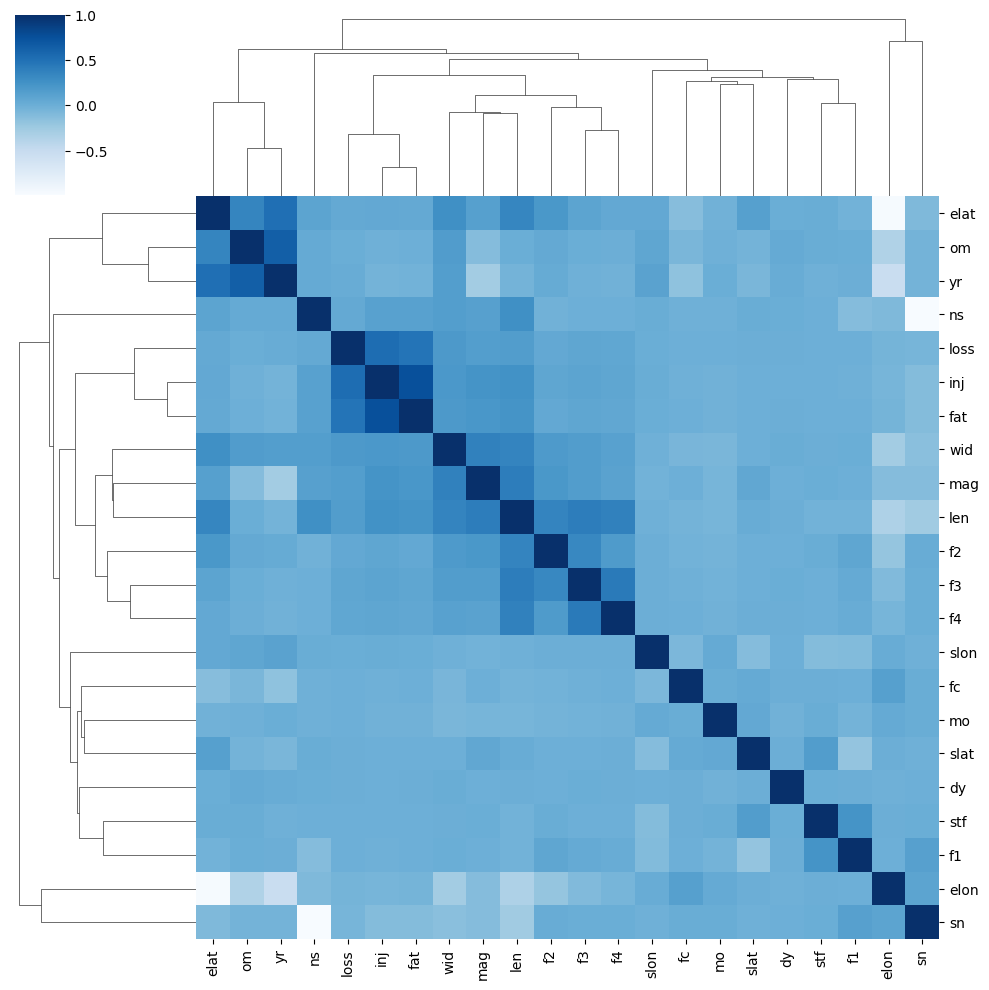

In [ ]:
# Calcul de la matrice de corrélation
correlation_matrix = data.corr()

# Visualisation
sns.clustermap(correlation_matrix,fmt='.2f',cmap='Blues')
plt.show()

## **Interprétations :**


> - "om" avec "yr" (forte corrélation)
- "yr", "mo", "dy" existent déjà dans le dataset sous forme d'une variable datetime, ce qui nous permet de les éliminer (pareil pour les colonnes "date", "time" et "tz")
- "stf" est le code fédéral de l'état dont le symbole est dans la variable catégorique "st" ce qui est redondant.
- "inj" et "fat" sont fortement et positivement corrélés ce qui permet de garder "inj" uniquement.
- "slat"/"slon", "elon"/"elat" et "wid"/"len" représentent l'étendu géographique des tornades, nous pouvons garder "wid"/"len".
- "ns" et "sn" sont inversement corrélé donc on peut garder que "ns".
- "f1", "f2", "f3" et "f4" représentent l'encodage des états donc redondant avec la variable catégorique "st".


## Conclusion :

**Variables retenues (9): [om, datetime_utc, st, mag, inj, loss, wid, len, ns]**



In [ ]:
# Garder que les variables choisies
data = data[['om', 'datetime_utc', 'st', 'mag', 'inj', 'loss', 'wid', 'len', 'ns']]

### **Etude statistique Bivariée**

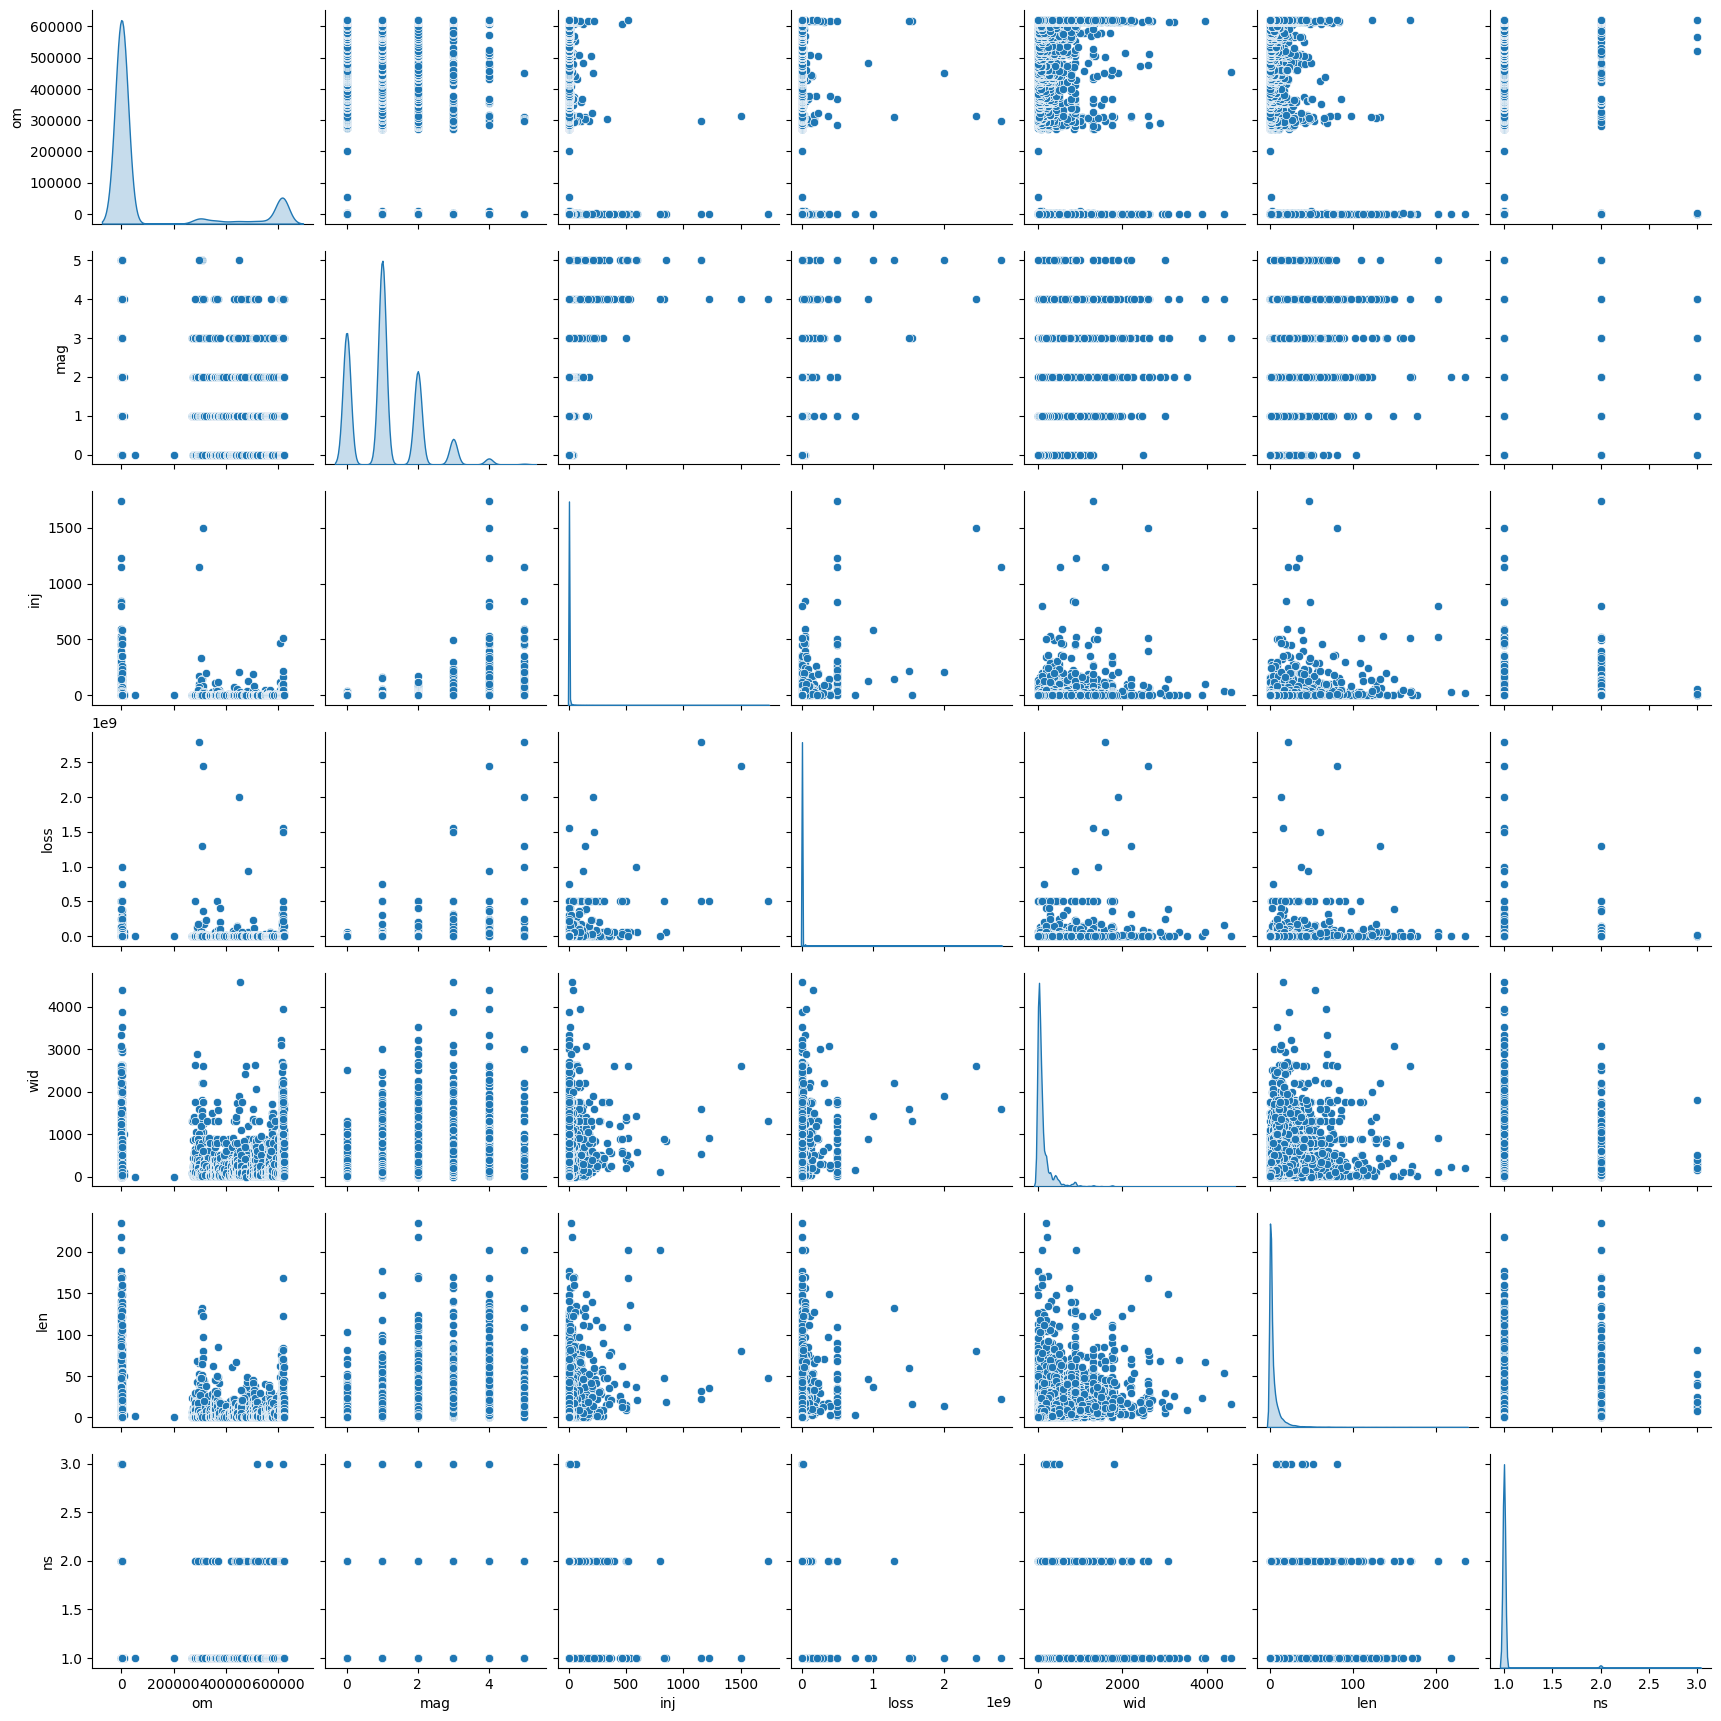

In [ ]:
# Visualiser
sns.pairplot(data, markers='o', hue=None, diag_kind='kde')
plt.show()

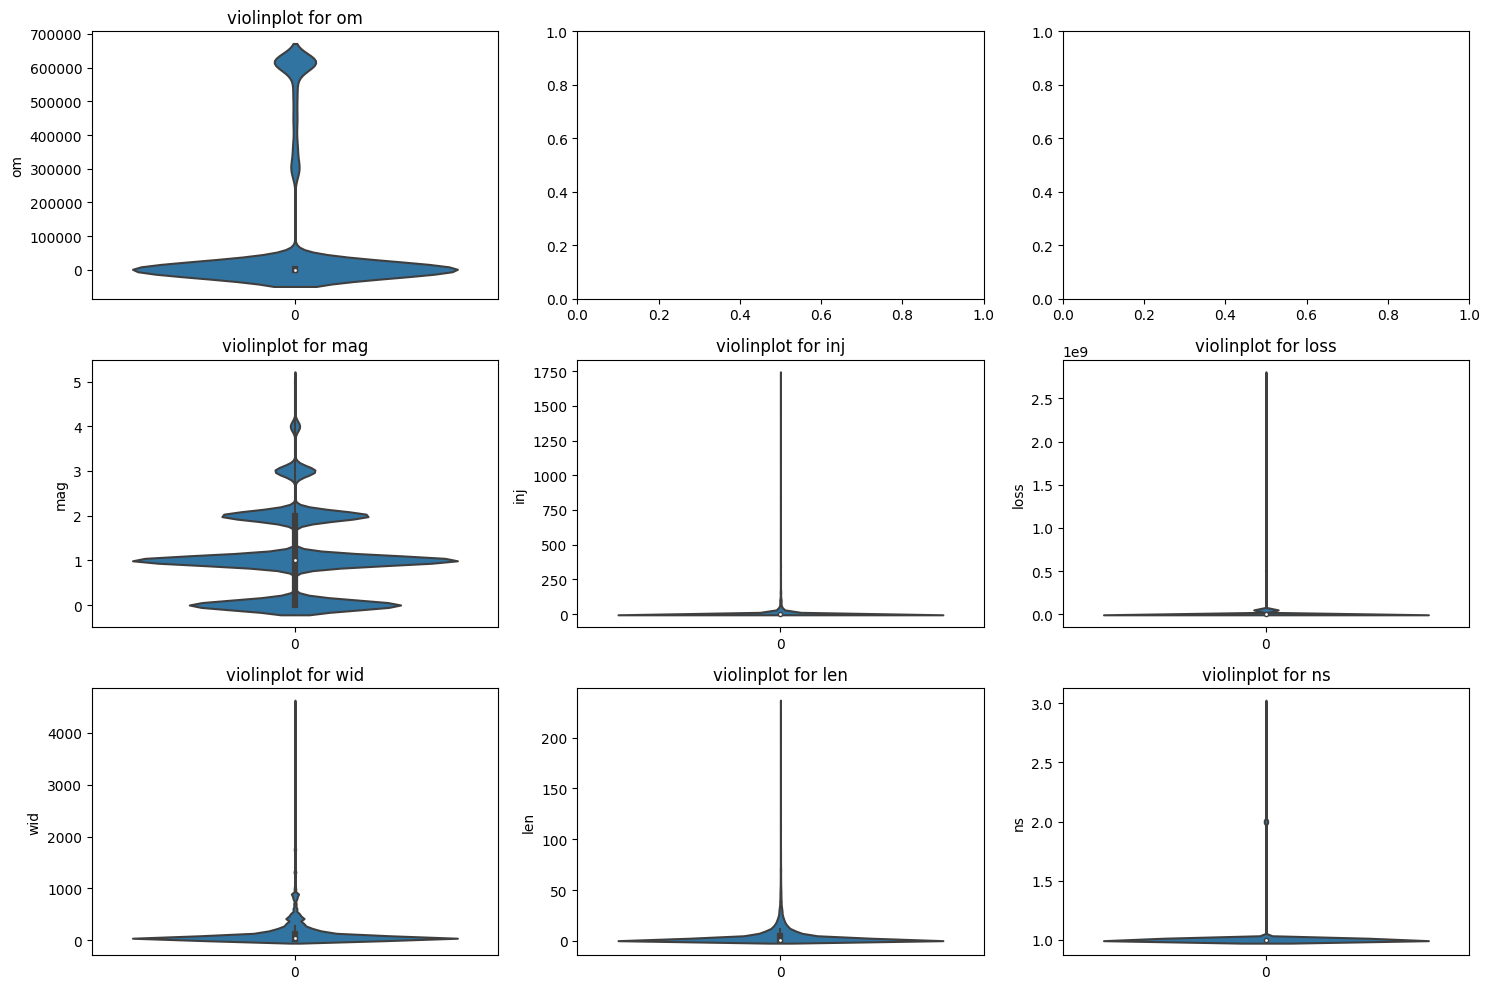

In [ ]:
num_rows = 3
fig, axs = plt.subplots(num_rows, len(data.columns) // num_rows, figsize=(15, 10))

for i, column in enumerate(data.columns):
    if column not in ("datetime_utc", "st"):
        row = i // (len(data.columns) // num_rows)
        col = i % (len(data.columns) // num_rows)
        ax = axs[row, col]

        # Create a violinplot for the current column
        sns.violinplot(data[column], ax=ax)

        # Display percentiles and outliers
        ax.set_title(f'violinplot for {column}')
        ax.set_ylabel(column)

plt.tight_layout()
plt.show()

### **Interprétations**


> - Nous remarquons que pour certains attributs les valeurs sont concentrées autour de la moyenne, alors que pour d'autres comme la magnitude par exemple nous distinguons des classes.
- Des valeurs aberrantes sont présentes pour cerains attributs



### **ACP**

Nous procédons à une analyse en composantes principales pour réduire la dimensionnalité des données et permettre de retrouver les variables qui explique la plus grande variance des données.

In [ ]:
#Normalization des données
X = data[['inj', 'wid', 'len', 'ns']].copy()
x = StandardScaler().fit_transform(X)

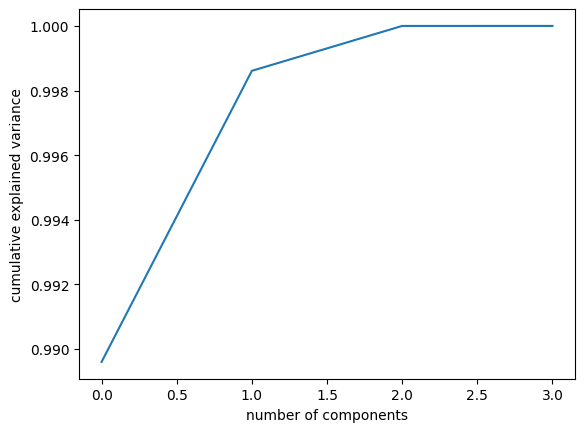

In [ ]:
#Trouver le nombre optimal de composantes principales à prendre avec le critère du coude
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
#Calcul des composantes principales
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'])

In [ ]:
#Chercher la variable
# Récupérer les composantes
component_loadings = pca.components_

# Identifier la variable qui influence la composante dominante
dominant_component_loadings = component_loadings[0]
influential_variables = X.columns

print(dominant_component_loadings)
print(influential_variables)

[0.43855601 0.5267528  0.59836401 0.41492244]
Index(['inj', 'wid', 'len', 'ns'], dtype='object')


### **Interprétation**
- Il est clair qu'il existe une variable dominante qui explique la plus grande variance des données qui est "wid"

- Nous pouvons envisager un clustering des données car une séparation existe
- Les 4 variables ont des degrés de contribution similaires

## **Analyse de série temporelle**

In [ ]:
#Formatter la colonne datetime_utc et la mettre en index
col = "datetime_utc"
df = data.loc[:, data.columns != col].copy()

index = data['datetime_utc']
index_timer = [dt.datetime.strptime(v, '%Y-%m-%dT%H:%M:%SZ') for v in index]

df.index = index_timer

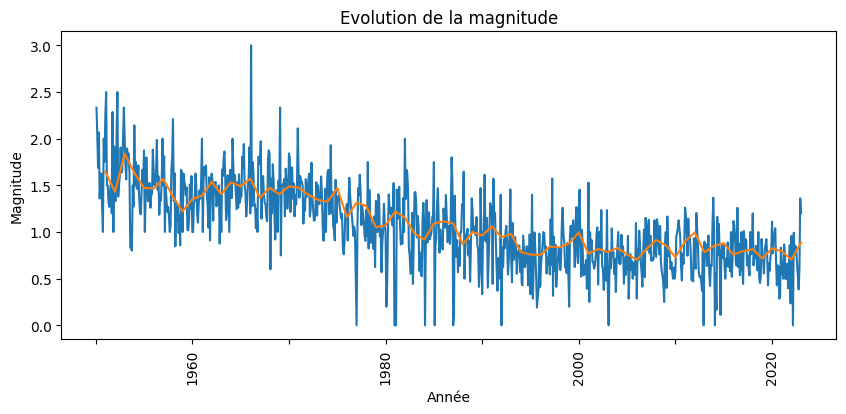

In [ ]:
# Visualiser l'évolution mensuelle et annuelle de la magnitude des tornades
fig,ax = plt.subplots(figsize=(10,4))
sns.lineplot(data=df['mag'].resample('M').mean())
sns.lineplot(data=df['mag'].resample('Y').mean())

ax.tick_params(axis='x', rotation=90)
ax.set(xlabel="Année",ylabel="Magnitude",title="Evolution de la magnitude")

n=2
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)
plt.show()

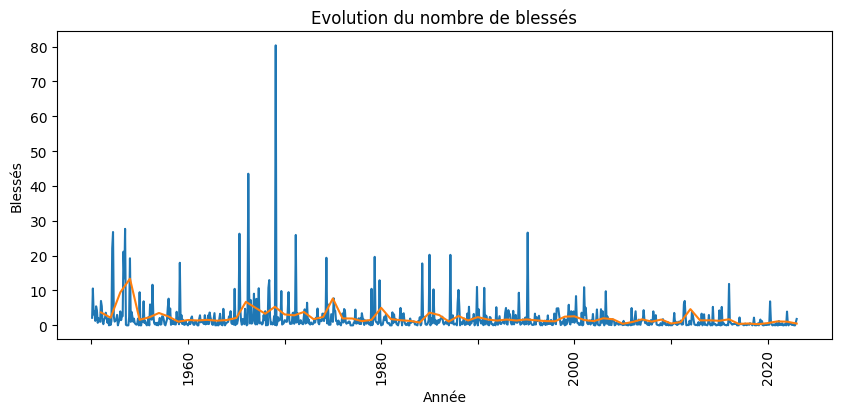

In [ ]:
# Visualiser l'évolution mensuelle et annuelle du nombre de blessés des tornades
fig,ax = plt.subplots(figsize=(10,4))
sns.lineplot(data=df['inj'].resample('M').mean())
sns.lineplot(data=df['inj'].resample('Y').mean())

ax.tick_params(axis='x', rotation=90)
ax.set(xlabel="Année",ylabel="Blessés",title="Evolution du nombre de blessés")

n=2
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)
plt.show()

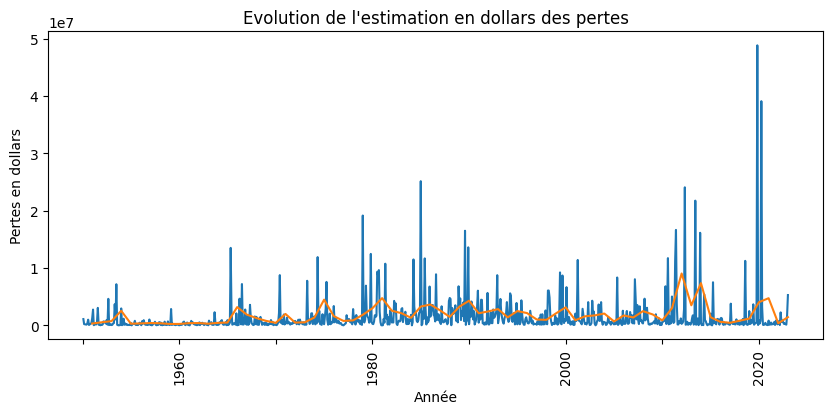

In [ ]:
# Visualiser l'évolution mensuelle et annuelle des pertes des tornades
fig,ax = plt.subplots(figsize=(10,4))
sns.lineplot(data=df['loss'].resample('M').mean())
sns.lineplot(data=df['loss'].resample('Y').mean())

ax.tick_params(axis='x', rotation=90)
ax.set(xlabel="Année",ylabel="Pertes en dollars",title="Evolution de l'estimation en dollars des pertes")

n=2
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)
plt.show()

### **Interprétations**


> - La série de l'évolution de la magnitude présente des motifs (patterns) en terme de tendance globale de la série ainsi que des piques de valeurs indiquant une existence possible de saisonnalités, donc une étude dans le cadre theorique des séries temporelle est envisagé.
- Les séries représentant l'évolution du nombre de blessés et l'estimation des pertes physiques n'exhibe pas une dépendance temporelle ce qui nous pousse à considérer un cadre d'étude d'apprentissage automatique classique et non pas de séries temporelles.                 



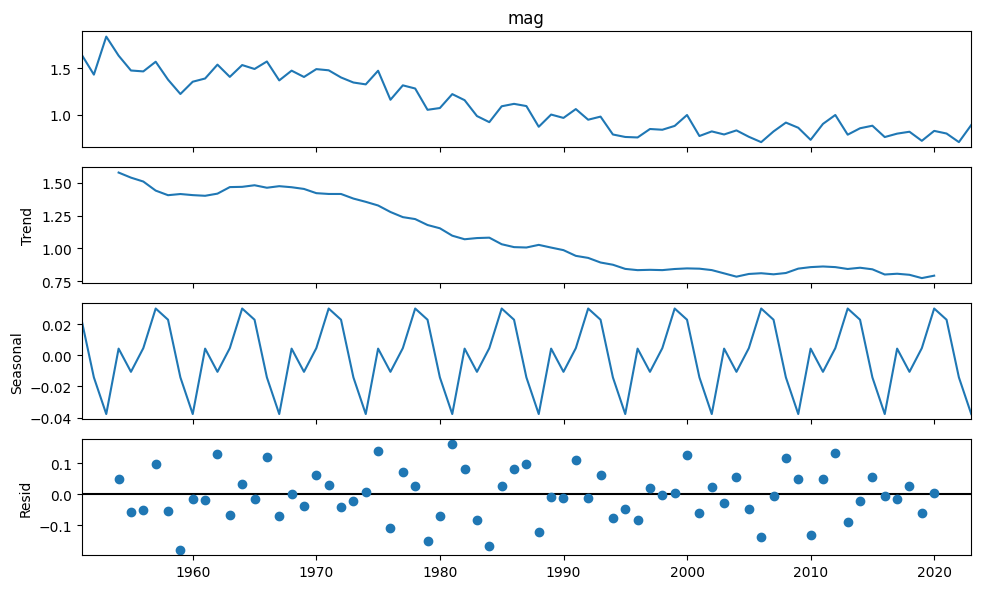

In [ ]:
#Décomposition de la série magnitude
df_decomp = df['mag'].resample('Y').mean().copy()
df_decomp.dropna(inplace=True)

decomp = seasonal_decompose(df_decomp, period=7, model='additive')

fig = decomp.plot()
fig.set_size_inches((10, 6))
fig.tight_layout()
plt.show()

### **Conclusion**


> - Nous pouvons orienter l'étude supervisée de notre problème vers la prédiction de la magnitude future dans un cadre théorique d'analyse et prédiction de séries temporelles.
- Nous pouvons également faire une classification supervisée selon les caractèristique d'une tornade à un instat t pour prédire l'intensité des dommages.

**Ceci fera l'objet du prochain notebook**


